# IR Assignment 3 
> by Ankit Kumar: ankit21015@iiitd.ac.in

In [1]:
import warnings

# Disable all warnings
warnings.filterwarnings('ignore')


In [112]:
# Two files
'''
Electronics.json':FileSize: 10.7GB,
                     Lines': 20994354,]
                     
meta_Electronics.json':FileSize: 10.2GB,
                        Lines': 786446,]
'''
                     



"\nElectronics.json':FileSize: 10.7GB,\n                     Lines': 20994354,]\n                     \nmeta_Electronics.json':FileSize: 10.2GB,\n                        Lines': 786446,]\n"

In [ ]:
pip install numpy pandas spacy beautifulsoup4 wordcloud matplotlib scikit-learn

In [1]:
import numpy as np
import pandas as pd
import os
import json
import re
import spacy
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

In [139]:
import json

# Path to the large JSON files
electronics_json_file_path = "Electronics.json"
meta_electronics_json_file_path = "meta_Electronics.json"

# Path to save the sample reviews JSON files


# Number of reviews to extract
num_reviews_to_extract = 200000
sample_electronics_reviews_file_path = f"sElectronics_{num_reviews_to_extract}.json"
sample_meta_electronics_reviews_file_path = f"sMeta_{num_reviews_to_extract}.json"
# Function to extract reviews from a JSON file
def extract_reviews(json_file_path, num_reviews):
    reviews_extracted = 0
    extracted_reviews = []
    with open(json_file_path, 'r') as large_file:
        for line in large_file:
            if reviews_extracted >= num_reviews:
                break
            review_data = json.loads(line)
            extracted_reviews.append(review_data)
            reviews_extracted += 1
    return extracted_reviews

# Extract reviews from Electronics.json
electronics_reviews = extract_reviews(electronics_json_file_path, num_reviews_to_extract)
# Save Electronics reviews to a file
with open(sample_electronics_reviews_file_path, 'w') as electronics_file:
    for review in electronics_reviews:
        json.dump(review, electronics_file)
        electronics_file.write('\n')

meta_electronics_reviews = extract_reviews(meta_electronics_json_file_path, num_reviews_to_extract)
with open(sample_meta_electronics_reviews_file_path, 'w') as meta_electronics_file:
    for review in meta_electronics_reviews:
        json.dump(review, meta_electronics_file)
        meta_electronics_file.write('\n')

print("Sample reviews extracted and saved successfully.")


Sample reviews extracted and saved successfully.


In [2]:
import pandas as pd
# size = 200000
# # Path to the large JSON files
# electronics_json_file_path = f"sElectronics_{size}.json"
# meta_electronics_json_file_path = f"sMeta_{size}.json"

electronics_json_file_path = f"Electronics.json"
meta_electronics_json_file_path = f"meta_Electronics.json"
# Function to read JSON file into dataframe
def json_to_dataframe_optimized(json_file_path):
    return pd.read_json(json_file_path, lines=True)

electronics_df = json_to_dataframe_optimized(electronics_json_file_path)
meta_electronics_df = json_to_dataframe_optimized(meta_electronics_json_file_path)


print("Electronics dataframe:")
# print(electronics_df.head())
print(electronics_df.info())

print("\nMeta Electronics dataframe:")
# print(meta_electronics_df.head())
print(meta_electronics_df.info())


Electronics dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20994353 entries, 0 to 20994352
Data columns (total 12 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   overall         int64 
 1   verified        bool  
 2   reviewTime      object
 3   reviewerID      object
 4   asin            object
 5   style           object
 6   reviewerName    object
 7   reviewText      object
 8   summary         object
 9   unixReviewTime  int64 
 10  vote            object
 11  image           object
dtypes: bool(1), int64(2), object(9)
memory usage: 1.7+ GB
None

Meta Electronics dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786445 entries, 0 to 786444
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   category         786445 non-null  object
 1   tech1            786445 non-null  object
 2   description      786445 non-null  object
 3   fit              786445 non-nul

In [9]:
# Step 3: Filter for 'Headphones'
headphones_meta = meta_electronics_df[meta_electronics_df['title'].str.contains('Headphone', case=False, na=False)]
headphones_reviews = electronics_df[electronics_df['asin'].isin(headphones_meta['asin'])]
headphones_reviews.drop_duplicates(subset=['reviewerID', 'asin'], inplace=True)
headphones_reviews.fillna({'reviewText': '', 'summary': ''}, inplace=True)

# Step 4: Descriptive Statistics
number_of_reviews = headphones_reviews.shape[0]
average_rating = headphones_reviews['overall'].mean()
number_of_unique_products = headphones_reviews['asin'].nunique()
number_of_good_ratings = headphones_reviews[headphones_reviews['overall'] > 3].shape[0]
number_of_bad_ratings = headphones_reviews[headphones_reviews['overall'] <= 3].shape[0]
reviews_per_rating = headphones_reviews['overall'].value_counts()

print(f"Total Number of Reviews for Headphones: {number_of_reviews}")
print(f"Average Rating Score: {average_rating:.2f}")
print(f"Number of Unique Headphone Products: {number_of_unique_products}")
print(f"Number of Good Ratings: {number_of_good_ratings}")
print(f"Number of Bad Ratings: {number_of_bad_ratings}")
print("Number of Reviews corresponding to each Rating:")
print(reviews_per_rating)


Total Number of Reviews for Headphones: 1553905
Average Rating Score: 3.91
Number of Unique Headphone Products: 26864
Number of Good Ratings: 1098538
Number of Bad Ratings: 455367
Number of Reviews corresponding to each Rating:
overall
5.0    833388
4.0    265150
1.0    199233
3.0    139264
2.0    116870
Name: count, dtype: int64


In [ ]:
pip install pandas beautifulsoup4 nltk

In [10]:
from bs4 import BeautifulSoup
import unicodedata
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ecesoclab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ecesoclab\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
import re
import unicodedata
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

REPLACE_NO_SPACE = re.compile(r"[^a-zA-Z0-9\s]")  # Pre-compiled

# Initialize objects outside the function
lemmatizer = WordNetLemmatizer()

def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

def remove_special_characters(text):
    text = REPLACE_NO_SPACE.sub('', text)
    return text

def lemmatize_text(text):
    word_tokens = word_tokenize(text)
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in word_tokens])
    return lemmatized_text

def normalize_text(text):
    text = str(text).lower()  # Ensure the input is a string and normalize text to lowercase
    text = remove_html_tags(text)
    text = remove_accented_chars(text)
    text = remove_special_characters(text)
    text = lemmatize_text(text)
    return text

In [9]:
# Preprocess and normalize reviewText
def process_description(description):
    """Combine list elements into a string and handle missing values."""
    if isinstance(description, list):
        return ' '.join(description)
    elif pd.isnull(description):
        return ''
    else:
        return description
headphones_reviews['processed_reviewText'] = headphones_reviews['reviewText'].apply(normalize_text)
# headphones_meta['processed_description'] = headphones_meta['description'].apply(process_description).apply(normalize_text)


# Display the processed text for verification
print(headphones_reviews[['reviewText', 'processed_reviewText']].head())
# print(headphones_meta[['description', 'processed_description']].head())


                                              reviewText  \
10653  Short, concise, easy to understand. Great tips...   
10654  Whomever said that 'good things come in little...   
12093  Great price,arrived faster than expected,good ...   
12094  Just pickEd em up the card go in and out You g...   
12095                   Will be returning, cheaply made.   

                                    processed_reviewText  
10653  short concise easy to understand great tip for...  
10654  whomever said that good thing come in little p...  
12093  great pricearrived faster than expectedgood pr...  
12094  just picked em up the card go in and out you g...  
12095                     will be returning cheaply made  


In [10]:
# Save the headphones_reviews dataframe to a pickle file
headphones_reviews.to_pickle("headphones_reviews_200000.pkl")
# headphones_reviews = pd.read_pickle("headphones_reviews.pkl")

In [3]:
headphones_reviews = pd.read_pickle("headphones_reviews.pkl")

In [16]:
headphones_reviews_with_brand = headphones_reviews.merge(meta_electronics_df[['asin', 'brand']], on='asin', how='left')
most_reviewed_brands = headphones_reviews_with_brand['brand'].value_counts().head(20)
print("Top 20 most reviewed brands:\n", most_reviewed_brands)


Top 20 most reviewed brands:
 brand
Sony              106069
Sennheiser         73590
Bose               33887
Beats              26355
Mpow               24975
Audio-Technica     24869
Koss               22354
Bluedio            20893
Symphonized        20579
JVC                20456
Panasonic          20427
Etre Jeune         18310
Philips            18025
EldHus             17610
XBRN               15897
TaoTronics         14658
Plantronics        14486
SoundPEATS         14272
MEE audio          12878
Toysdone           12796
Name: count, dtype: int64


In [17]:
# Use the same data but get the last 20 entries
least_reviewed_brands = headphones_reviews_with_brand['brand'].value_counts().tail(20)[::-1]
print("Top 20 least reviewed brands:\n", least_reviewed_brands)


Top 20 least reviewed brands:
 brand
Howard O. Pittman      1
Maxpod                 1
Stitch                 1
DZAT                   1
Phshion                1
Matezon                1
EzzMaxx                1
MOMO                   1
TKS                    1
UNHO                   1
E-3LUE                 1
Twisters               1
FocalTop               1
Creek                  1
U Happy                1
Vicious Vinyl Shack    1
YUIN                   1
Blueflame              1
Fosheng                1
April Music            1
Name: count, dtype: int64


In [18]:
# Filter for reviews with a rating of 5
positively_reviewed = headphones_reviews_with_brand[headphones_reviews_with_brand['overall'] == 5]

# Group by product and count, then retrieve the product with the highest count
most_positively_reviewed_headphone = positively_reviewed['asin'].value_counts().idxmax()

# Find the product title
product_title = meta_electronics_df.loc[meta_electronics_df['asin'] == most_positively_reviewed_headphone, 'title'].values[0]
print(f"The most positively reviewed headphone is: {product_title}")


The most positively reviewed headphone is: Sony MDR7506 Professional Large Diaphragm Headphone


In [19]:
# Convert reviewTime to datetime
headphones_reviews['reviewTime'] = pd.to_datetime(headphones_reviews['reviewTime'])

# Filter reviews for the last 5 years and count ratings per year
ratings_per_year = headphones_reviews.groupby(headphones_reviews['reviewTime'].dt.year)['overall'].value_counts().unstack().fillna(0).tail(5)
print("Count of ratings for the product over 5 consecutive years:\n", ratings_per_year)


Count of ratings for the product over 5 consecutive years:
 overall         1.0      2.0      3.0      4.0       5.0
reviewTime                                              
2014        20525.0  13024.0  18113.0  37500.0  112327.0
2015        42119.0  24582.0  30365.0  57790.0  187244.0
2016        56260.0  30941.0  35178.0  64768.0  210633.0
2017        36387.0  19752.0  21223.0  35761.0  135478.0
2018        18708.0   9601.0   9853.0  15533.0   62241.0


In [20]:
headphones_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1553905 entries, 10653 to 20994204
Data columns (total 13 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   overall               1553905 non-null  float64       
 1   verified              1553905 non-null  bool          
 2   reviewTime            1553905 non-null  datetime64[ns]
 3   reviewerID            1553905 non-null  object        
 4   asin                  1553905 non-null  object        
 5   style                 947492 non-null   object        
 6   reviewerName          1553751 non-null  object        
 7   reviewText            1553905 non-null  object        
 8   summary               1553905 non-null  object        
 9   unixReviewTime        1553905 non-null  int64         
 10  vote                  163622 non-null   object        
 11  image                 27215 non-null    object        
 12  processed_reviewText  1553905 non-null  ob

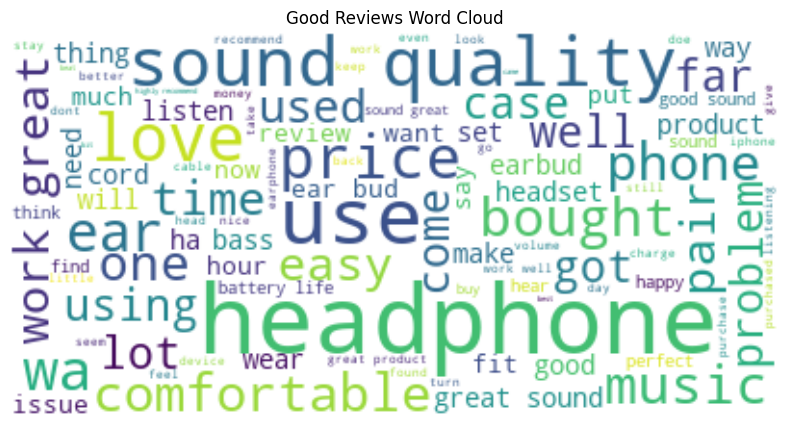

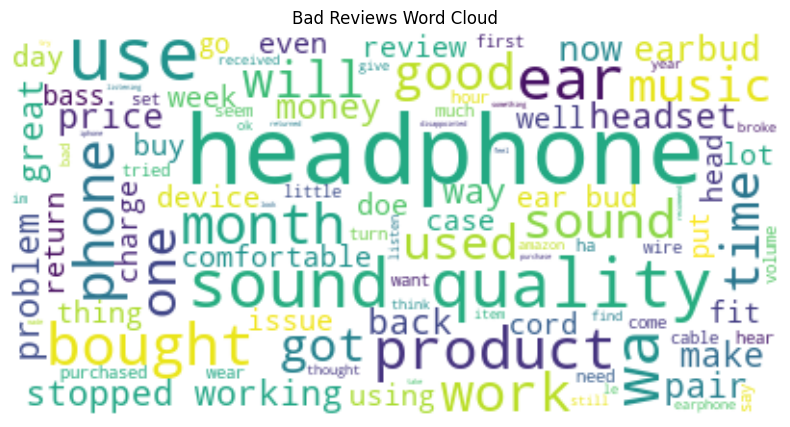

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds for Good (rating > 3) and Bad (rating <= 3) reviews
# headphones_reviews['processed_reviewText'] = headphones_reviews['reviewText'].apply(normalize_text)
good_reviews = ' '.join(headphones_reviews[headphones_reviews['overall'] > 3]['processed_reviewText'])
bad_reviews = ' '.join(headphones_reviews[headphones_reviews['overall'] <= 3]['processed_reviewText'])

# Good reviews word cloud
wordcloud_good = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(good_reviews)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_good, interpolation="bilinear")
plt.axis("off")
plt.title("Good Reviews Word Cloud")
plt.show()

# Bad reviews word cloud
wordcloud_bad = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(bad_reviews)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_bad, interpolation="bilinear")
plt.axis("off")
plt.title("Bad Reviews Word Cloud")
plt.show()


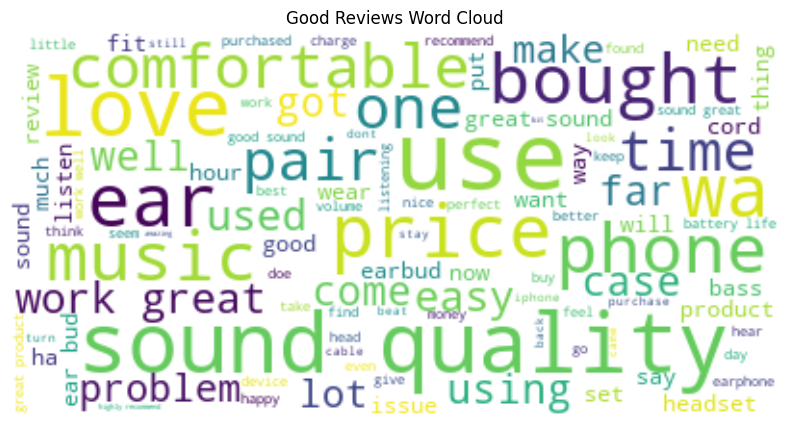

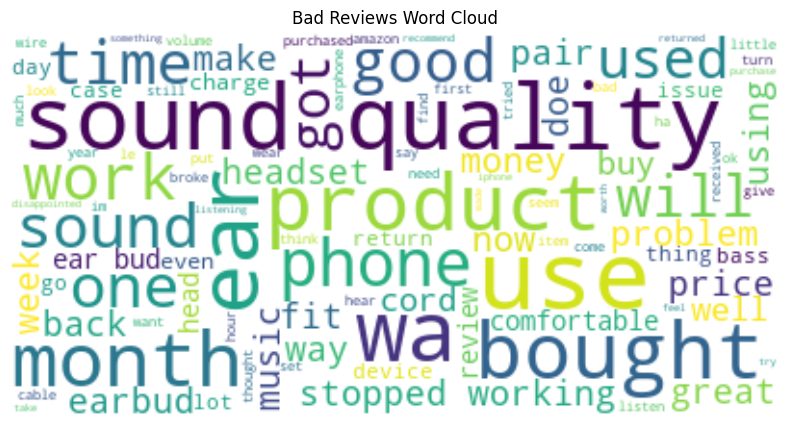

In [23]:
# remove headphone keywords cause it's obvious
good_reviews = ' '.join(headphones_reviews[headphones_reviews['overall'] > 3]['processed_reviewText'].str.replace('headphone', ''))
bad_reviews = ' '.join(headphones_reviews[headphones_reviews['overall'] <= 3]['processed_reviewText'].str.replace('headphone', ''))

# Good reviews word cloud
wordcloud_good = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(good_reviews)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_good, interpolation="bilinear")
plt.axis("off")
plt.title("Good Reviews Word Cloud")
plt.show()

# Bad reviews word cloud
wordcloud_bad = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(bad_reviews)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_bad, interpolation="bilinear")
plt.axis("off")
plt.title("Bad Reviews Word Cloud")
plt.show()

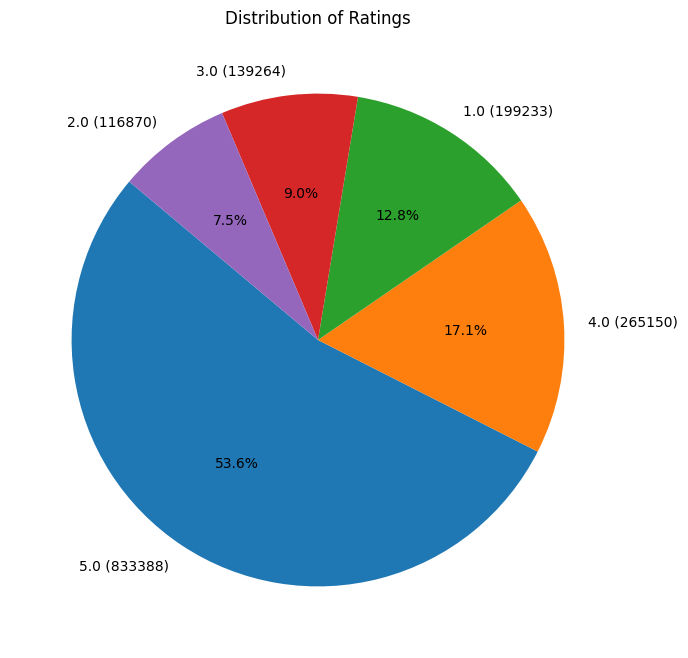

In [24]:

# Calculate ratings distribution
ratings_distribution = headphones_reviews['overall'].value_counts()

# Plot
plt.figure(figsize=(8, 8))
plt.pie(ratings_distribution, labels=[f"{rating} ({count})" for rating, count in zip(ratings_distribution.index, ratings_distribution.values)], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ratings')
plt.show()



In [25]:
max_reviews_year = headphones_reviews['reviewTime'].dt.year.value_counts().idxmax()
print(f"Year with maximum reviews: {max_reviews_year}")


Year with maximum reviews: 2016


In [26]:
year_with_highest_customers = headphones_reviews.groupby(headphones_reviews['reviewTime'].dt.year)['reviewerID'].nunique().idxmax()
print(f"Year with the highest number of customers: {year_with_highest_customers}")


Year with the highest number of customers: 2016


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Limiting to 1000 features for simplicity
# X = tfidf_vectorizer.fit_transform(headphones_reviews['processed_reviewText']).toarray()
X = tfidf_vectorizer.fit_transform(headphones_reviews['processed_reviewText'])


# Categorizing the rating
headphones_reviews['rating_category'] = headphones_reviews['overall'].apply(lambda x: 'Good' if x > 3 else ('Average' if x == 3 else 'Bad'))

# Encoding the target variable
y = headphones_reviews['rating_category']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [30]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.svm import LinearSVC
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "SVM (Optimized)": LinearSVC(dual=False, max_iter=1000),
    "Random Forest (Optimized)": RandomForestClassifier(n_estimators=50, max_depth=5, n_jobs=-1),
    "Gradient Boosting (Optimized)": HistGradientBoostingClassifier( max_iter=50, max_leaf_nodes=16, learning_rate=0.05, random_state=42, verbose=0)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))


Model: Logistic Regression
              precision    recall  f1-score   support

     Average       0.44      0.14      0.21     35077
         Bad       0.75      0.77      0.76     78806
        Good       0.88      0.95      0.92    274594

    accuracy                           0.84    388477
   macro avg       0.69      0.62      0.63    388477
weighted avg       0.82      0.84      0.82    388477

Model: Naive Bayes
              precision    recall  f1-score   support

     Average       0.56      0.00      0.00     35077
         Bad       0.84      0.44      0.57     78806
        Good       0.78      0.99      0.87    274594

    accuracy                           0.79    388477
   macro avg       0.73      0.48      0.48    388477
weighted avg       0.77      0.79      0.73    388477

Model: SVM (Optimized)
              precision    recall  f1-score   support

     Average       0.50      0.06      0.10     35077
         Bad       0.74      0.77      0.76     78806
      

In [ ]:
headphones_reviews.info()

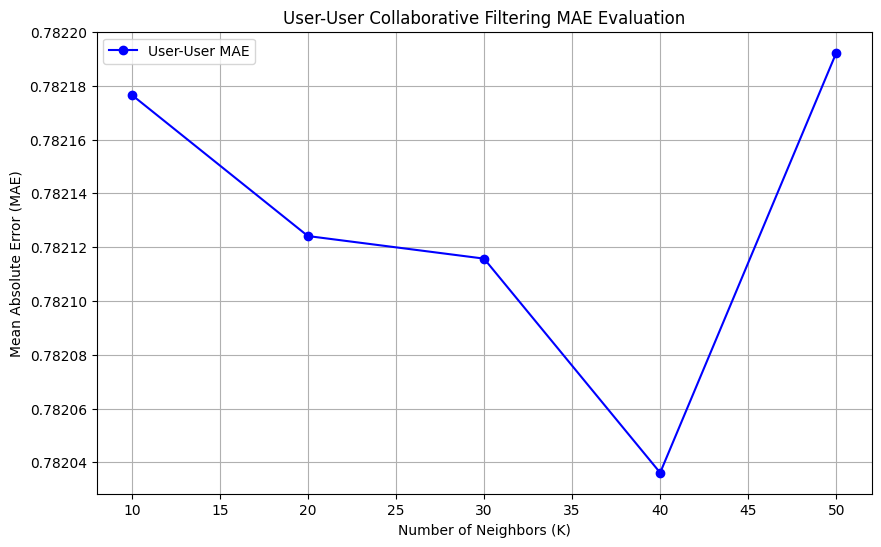

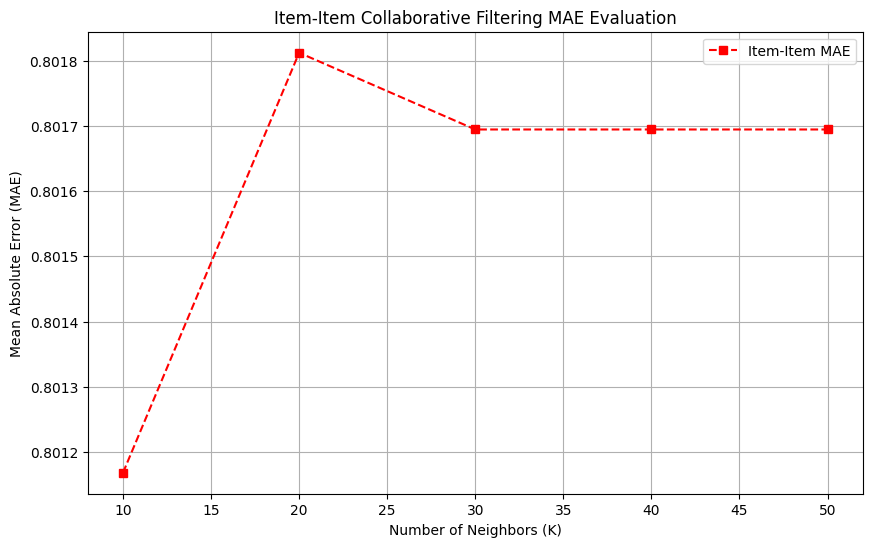

In [11]:
from scipy.sparse import csr_matrix
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# headphones_reviews_sampled  = headphones_reviews.sample(frac = 0.1, random_state=42)
# headphones_reviews_sampled['overall'] = headphones_reviews_sampled['overall'].astype('float32')
# user_item_matrix = headphones_reviews_sampled.pivot(index='reviewerID', columns='asin', values='overall').fillna(0)

user_item_matrix = headphones_reviews.pivot(index='reviewerID', columns='asin', values='overall').fillna(0)
# # Selecting a subset of rows and columns
# small_headphones_df = headphones_reviews[['overall', 'asin', 'reviewerID' ]].head(10000)
# user_item_matrix = headphones_reviews.pivot(index='reviewerID', columns='asin', values='overall').fillna(0)
# Printing the reduced dataframe
# print(small_headphones_df)
#if normalization really needed
scaler = MinMaxScaler()
user_item_matrix_normalized = scaler.fit_transform(user_item_matrix)
user_item_matrix_normalized = pd.DataFrame(user_item_matrix_normalized, 
                                           index=user_item_matrix.index, 
                                           columns=user_item_matrix.columns)

def cosine_similarity_manual(X):
    # Calculate dot product
    dot_product = X.dot(X.T)
    # Calculate magnitude for normalization
    magnitude = np.sqrt(X.power(2).sum(axis=1))
    # Compute cosine similarity, ensuring non-zero denominator
    similarity = (dot_product / magnitude).T / magnitude
    similarity = np.nan_to_num(similarity)  # Handle NaNs if magnitude is zero
    return csr_matrix(similarity)  # Ensure the output is in CSR format

def evaluate_collaborative_filtering(k_values, user_item_matrix_df, matrix_type='user'):
    kf = KFold(n_splits=5)
    mae_values_user = []
    mae_values_item = []

    for k in k_values:
        mae_sum_user = 0
        mae_sum_item = 0
        count_user = 0
        count_item = 0

        for train_index, test_index in kf.split(user_item_matrix_df):
            # Splitting data into train and test sets for users and items
            train_data = user_item_matrix_df.iloc[train_index]
            test_data = user_item_matrix_df.iloc[test_index]

            # Convert train data to CSR format for similarity computation
            train_sparse = csr_matrix(train_data.values)
            test_sparse = csr_matrix(test_data.values)

            # Calculate cosine similarity for user-user and item-item
            similarity_user = cosine_similarity_manual(train_sparse) if matrix_type == 'user' else None
            similarity_item = cosine_similarity_manual(train_sparse.T) if matrix_type == 'item' else None

            # Iterate through test data
            for idx, row in enumerate(test_sparse.toarray()):
                rated_items = np.flatnonzero(row)
                
                for item_idx in rated_items:
                    if matrix_type == 'user':
                        # User-user similarity and prediction logic
                        sim_scores = similarity_user[idx, :].toarray().flatten()
                        top_k_indices = np.argsort(-sim_scores)[1:k+1]  # Exclude self
                        top_k_similarities = sim_scores[top_k_indices]
                        ratings_from_similars = train_data.values[top_k_indices, item_idx]
                        pred_rating = np.dot(top_k_similarities, ratings_from_similars) / np.sum(top_k_similarities if np.sum(top_k_similarities) != 0 else 1)
                        mae_sum_user += np.abs(pred_rating - row[item_idx])
                        count_user += 1

                    if matrix_type == 'item':
                        # Item-item similarity and prediction logic
                        sim_scores = similarity_item[:, item_idx].toarray().flatten()
                        top_k_indices = np.argsort(-sim_scores)[1:k+1]  # Exclude current item
                        top_k_similarities = sim_scores[top_k_indices]
                        ratings_from_similars = train_data.values[idx, top_k_indices]
                        pred_rating = np.dot(top_k_similarities, ratings_from_similars) / np.sum(top_k_similarities if np.sum(top_k_similarities) != 0 else 1)
                        mae_sum_item += np.abs(pred_rating - row[item_idx])
                        count_item += 1

        # Calculate and append the average MAE for this k for user-user and item-item
        mae_values_user.append(mae_sum_user / count_user if count_user else float('nan'))
        mae_values_item.append(mae_sum_item / count_item if count_item else float('nan'))

    return mae_values_user, mae_values_item

# Evaluate both user-user and item-item collaborative filtering
k_values = [10, 20, 30, 40, 50]
user_user_mae, item_item_mae = evaluate_collaborative_filtering(k_values, user_item_matrix_normalized, 'user')
_, item_item_mae = evaluate_collaborative_filtering(k_values, user_item_matrix_normalized, 'item')

# Plotting the MAE for User-User and Item-Item Collaborative Filtering
# Plotting the MAE for User-User Collaborative Filtering
plt.figure(figsize=(10, 6))
plt.plot(k_values, user_user_mae, marker='o', linestyle='-', color='blue', label='User-User MAE')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('User-User Collaborative Filtering MAE Evaluation')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the MAE for Item-Item Collaborative Filtering
plt.figure(figsize=(10, 6))
plt.plot(k_values, item_item_mae, marker='s', linestyle='--', color='red', label='Item-Item MAE')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Item-Item Collaborative Filtering MAE Evaluation')
plt.legend()
plt.grid(True)
plt.show()





In [13]:
print("User-User Collaborative Filtering MAE Values:", user_user_mae)
print("Item-Item Collaborative Filtering MAE Values:", item_item_mae)

User-User Collaborative Filtering MAE Values: [0.7821766302667899, 0.782124134365546, 0.7821157385300801, 0.7820361286578879, 0.7821922991082872]
Item-Item Collaborative Filtering MAE Values: [0.801168583654993, 0.8018119957664103, 0.8016944058826564, 0.8016944058826564, 0.8016944058826564]


In [151]:
# First, ensure that 'asin' values in the metadata DataFrame are unique
meta_electronics_df_unique = meta_electronics_df.drop_duplicates(subset='asin')

# Create a Series with product titles indexed by ASIN
titles = meta_electronics_df_unique.set_index('asin')['title']

# Filter for only positive ratings (3, 4, and 5 stars)
positive_reviews = headphones_reviews[headphones_reviews['overall'] >= 3]

# Group by product ASIN and count the number of positive ratings, then sort
top_rated_products = positive_reviews.groupby('asin')['overall'].count().sort_values(ascending=False).head(10)

# Map the titles to the top_rated_products Series
top_rated_products_with_titles = top_rated_products.map(titles)

# Construct a DataFrame to display the results
top_rated_products_df = pd.DataFrame({
    'ASIN': top_rated_products.index,
    'Positive Review Count': top_rated_products.values,
})

# Reset index to display ASIN as a column
top_rated_products_df.reset_index(drop=True, inplace=True)

# Display the DataFrame
print(top_rated_products_df)


         ASIN  Positive Review Count
0  B00004T8R2                   3757
1  B00001P4ZH                   3184
2  B00001WRSJ                   2675
3  B000065BPB                   1427
4  B00005N9D3                   1243
5  B00005N6KG                   1194
6  B000065BP9                   1022
7  B00005QBU9                    956
8  B00001P4XA                    863
9  B00005RFD3                    840


In [155]:
# Group by product and sum up the ratings, then sort by the sum in descending order
top_products_by_ratings = headphones_reviews.groupby('asin')['overall'].sum().sort_values(ascending=False).head(10)

# Display the top 10 products by user sum ratings
print(top_products_by_ratings)

asin
B00004T8R2    17851.0
B00001P4ZH    15158.0
B00001WRSJ    12914.0
B000065BPB     6814.0
B00005N9D3     5923.0
B00005N6KG     5757.0
B000065BP9     4736.0
B00005QBU9     4605.0
B00005RFD3     4161.0
B00001P4XA     4157.0
Name: overall, dtype: float64
